In [1]:
import pandas 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import random


#### Данные 
##### Поля в базе:
- "Класс",
- "Код предмета (1- РУ, 2- МА)",
- "ОО (логин школы)",
- "Код ученика",
- "Балл",
- "Отметка",
- "Year - Учебный год". 
В логине ОО 4-ый и 5-ый символы (2 первые цифры) - это код региона (из федерального справочника, прилагается). Т.е. sch77171506 - это школа региона 77 (г.Москва).

Максимальные баллы за работу (контрольно - измерительный материал): РУ 4 класс-38 баллов, РУ 5,6 класс-45 баллов, МА 4 класс - 20 баллов, МА 5,6 класс - 20 баллов.

In [3]:
dataset = pandas.read_csv('pupils_ruma456_2019_2020\pupils_ruma456_2019_2020.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2388599070.py:1: SyntaxWarning: invalid escape sequence '\p'
  dataset = pandas.read_csv('pupils_ruma456_2019_2020\pupils_ruma456_2019_2020.csv')
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2388599070.py:1: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pandas.read_csv('pupils_ruma456_2019_2020\pupils_ruma456_2019_2020.csv')


In [4]:
dataset.shape

(11221349, 7)

###### Датасет содержит 11221349 строки и 7 колонок 

In [6]:
dataset.head()

,Класс,Код_предмета,ЛогинОО,Код_ученика,Балл,Отметка,Year
0,4,2,sch01110001,4001,11,4,2019
1,4,2,sch01110001,4002,18,5,2019
2,4,2,sch01110001,4003,9,3,2019
3,4,2,sch01110001,4004,11,4,2019
4,4,2,sch01110001,4005,8,3,2019


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11221349 entries, 0 to 11221348
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Класс         object
 1   Код_предмета  object
 2   ЛогинОО       object
 3   Код_ученика   object
 4   Балл          object
 5   Отметка       object
 6   Year          int64 
dtypes: int64(1), object(6)
memory usage: 599.3+ MB


#### Колонка "Класс"

In [9]:
# Проверяем на пустые значения 
dataset['Класс'].value_counts()

Класс
5    5382367
4    3086470
6    2359296
6     248415
5     144798
           3
Name: count, dtype: int64

##### 3 значения являются пустой строкой. Выкидываем их
##### Некорые значения записаны в формате str, а некоторые в int. Переведем все в int

In [11]:
dataset = dataset[dataset['Класс']!=' ']
dataset['Класс'] = dataset['Класс'].agg(lambda x : int(x))

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\1791497540.py:2: FutureWarning: using <function <lambda> at 0x000002DB000242C0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Класс'] = dataset['Класс'].agg(lambda x : int(x))


In [12]:
dataset['Класс'].value_counts()

Класс
5    5527165
4    3086470
6    2607711
Name: count, dtype: int64

<Axes: >

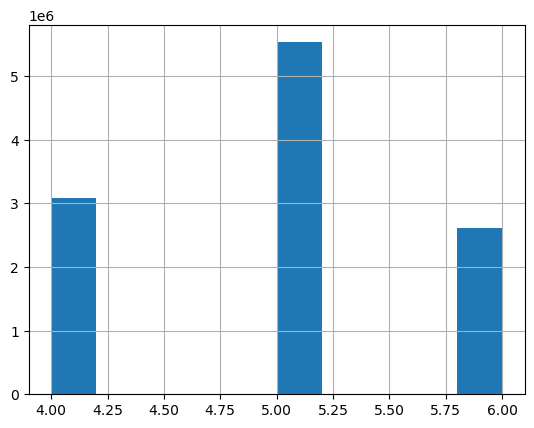

In [13]:
dataset['Класс'].hist()

##### В выборке всегос 3 класса. 
##### Больше всего наблюдений из 5 класса. 
##### Из 4 и 6 примерно одинаково. 
##### Признак является порядковым, потому one-hot-encoding не нужен

#### Колонка "Код_предмета"

In [16]:
dataset['Код_предмета'].value_counts()

Код_предмета
2    5441828
1    5386305
2     198491
1     194722
Name: count, dtype: int64

In [17]:
print(f'Пустых строк = {sum(dataset['Код_предмета'].isna())}')

Пустых строк = 0


###### Некорые значения записаны в формате str, а некоторые в int. Переведем все в int

In [19]:
dataset['Код_предмета'] = dataset['Код_предмета'].agg(lambda x : int(x))

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2271426698.py:1: FutureWarning: using <function <lambda> at 0x000002DB00F572E0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Код_предмета'] = dataset['Код_предмета'].agg(lambda x : int(x))


<Axes: >

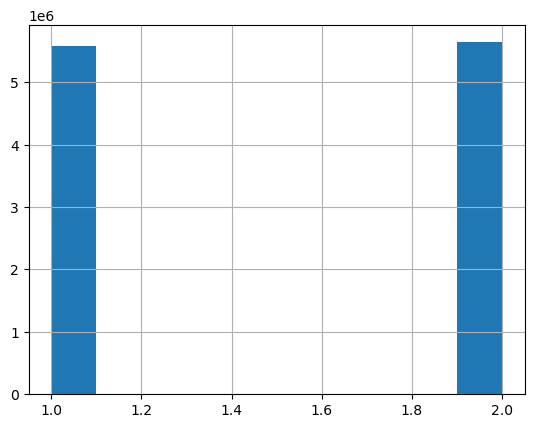

In [20]:
dataset['Код_предмета'].hist()

###### В датасете примерно одинаковое количество наблюдей обоих значений
###### Признак является категориальным, потому проведем one-hot-encoding 

In [22]:
def one_hot_encoding_ru(x):

    if x == 1:
        
        return 1
        
    else:
        
        return 0 

def one_hot_encoding_ma(x):

    if x == 2:
        
        return 1
        
    else:
        
        return 0 

In [23]:
dataset['РУ'] = dataset['Код_предмета'].agg(one_hot_encoding_ru)
dataset['МА'] = dataset['Код_предмета'].agg(one_hot_encoding_ma)
del dataset['Код_предмета']

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2627994782.py:1: FutureWarning: using <function one_hot_encoding_ru at 0x000002DB00FCF1A0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['РУ'] = dataset['Код_предмета'].agg(one_hot_encoding_ru)
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2627994782.py:2: FutureWarning: using <function one_hot_encoding_ma at 0x000002DB00FCF420> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['МА'] = dataset['Код_предмета'].agg(one_hot_encoding_ma)


In [24]:
dataset.head()

,Класс,ЛогинОО,Код_ученика,Балл,Отметка,Year,РУ,МА
0,4,sch01110001,4001,11,4,2019,0,1
1,4,sch01110001,4002,18,5,2019,0,1
2,4,sch01110001,4003,9,3,2019,0,1
3,4,sch01110001,4004,11,4,2019,0,1
4,4,sch01110001,4005,8,3,2019,0,1


#### Колонка "ЛогинОО"

In [26]:
dataset['ЛогинОО'].value_counts()

ЛогинОО
sch72120397    4666
sch23133988    4630
sch23133985    4544
sch72123046    4171
sch72123048    3395
               ... 
sch03136025       1
sch05153509       1
sch66163320       1
sch55156133       1
sch70103089       1
Name: count, Length: 39391, dtype: int64

In [27]:
print(f'Пустых строк = {sum(dataset['ЛогинОО'].isna())}')

Пустых строк = 0


##### В выборке нет пустых строк.
##### Получим данные о регионе из логика . Номер региона - это первые 2 цифры 

In [29]:
dataset['Регион'] = dataset['ЛогинОО'].agg(lambda x: x[3:5])


C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\390606912.py:1: FutureWarning: using <function <lambda> at 0x000002DB00DDC680> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Регион'] = dataset['ЛогинОО'].agg(lambda x: x[3:5])


In [30]:
dataset['Регион'].value_counts()

Регион
50    614856
23    500170
66    357102
02    352522
78    333971
       ...  
79     14056
49     10461
90      7525
87      4417
83      4098
Name: count, Length: 86, dtype: int64

##### Признак "Регион" является категориальным, потому проведем one-hot-encoding 

In [32]:
names_of_regions = dataset['Регион'].unique()

In [33]:
def one_hot(x):
    if x == True:
        return 1
    else:
        return 0

In [34]:
for i in names_of_regions:
    dataset[i] = (dataset['Регион'] == i).agg(one_hot)
    
del dataset['Регион']

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\3306363753.py:2: FutureWarning: using <function one_hot at 0x000002DB00DDD120> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset[i] = (dataset['Регион'] == i).agg(one_hot)
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\3306363753.py:2: FutureWarning: using <function one_hot at 0x000002DB00DDD120> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset[i] = (dataset['Регион'] == i).agg(one_hot)
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\3306363753.py:2: FutureWarning: using <function one_hot at 0x000002DB00DDD120> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset[i] = (dataset['Регион'] == i).agg(one_hot)
C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\3306363753.py:2: FutureWarning: using <function one_hot at 0x000002DB00DDD120> in Series.agg 

In [35]:
dataset.head()

,Класс,ЛогинОО,Код_ученика,Балл,Отметка,Year,РУ,МА,01,02,...,77,78,79,82,83,86,87,89,90,92
0,4,sch01110001,4001,11,4,2019,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,sch01110001,4002,18,5,2019,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,sch01110001,4003,9,3,2019,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,sch01110001,4004,11,4,2019,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,sch01110001,4005,8,3,2019,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dataset.shape

(11221346, 94)

#### Колонка "Код_ученика"

In [38]:
dataset['Код_ученика'].value_counts()

Код_ученика
4001     73384
4002     71593
5001     69621
4003     68977
5002     68025
         ...  
50503        1
50504        1
50513        1
50514        1
50795        1
Name: count, Length: 4483, dtype: int64

In [39]:
print(f'Пустых строк = {sum(dataset['Код_ученика'].isna())}')

Пустых строк = 0


C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\3088078780.py:1: FutureWarning: using <function <lambda> at 0x000002DB00DDF060> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Код_ученика'].agg(lambda x: int(x)).hist()


<Axes: >

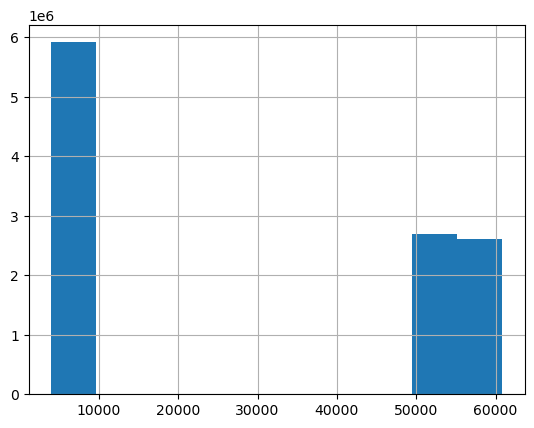

In [40]:
dataset['Код_ученика'].agg(lambda x: int(x)).hist()

##### В данных явная аномалия. потому удалим этот столбец 

In [42]:
del dataset['Код_ученика']

#### Колонка "Балл"

In [44]:
dataset['Балл'].value_counts()

Балл
11    559992
14    554918
12    532355
7     510728
13    504913
       ...  
42      1625
0       1547
43      1152
44       770
45       331
Name: count, Length: 92, dtype: int64

In [45]:
print(f'Пустых строк = {sum(dataset['Балл'].isna())}')

Пустых строк = 0


In [46]:
dataset['Балл'] = dataset['Балл'].agg(lambda x: int(x))

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2081107328.py:1: FutureWarning: using <function <lambda> at 0x000002DB5EB428E0> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Балл'] = dataset['Балл'].agg(lambda x: int(x))


<Axes: >

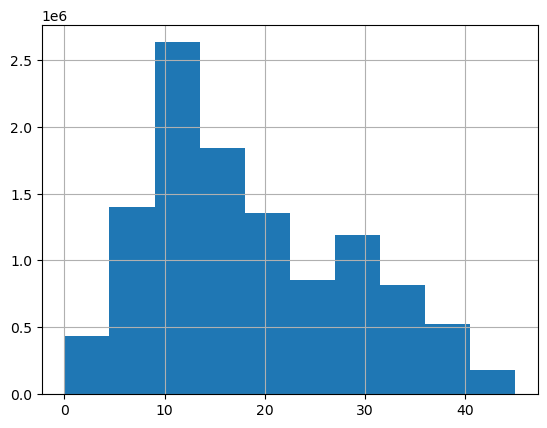

In [47]:
dataset['Балл'].hist()

##### Признак Балл является действительным. Потому преведем его к размерности 0 - 1


In [49]:
scaler = MinMaxScaler()
scaler.fit(np.array(dataset['Балл']).reshape(-1, 1))
dataset['Балл_scal'] = scaler.transform(np.array(dataset['Балл']).reshape(-1, 1))

In [50]:
dataset

,Класс,ЛогинОО,Балл,Отметка,Year,РУ,МА,01,02,03,...,78,79,82,83,86,87,89,90,92,Балл_scal
0,4,sch01110001,11,4,2019,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.244444
1,4,sch01110001,18,5,2019,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.400000
2,4,sch01110001,9,3,2019,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.200000
3,4,sch01110001,11,4,2019,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.244444
4,4,sch01110001,8,3,2019,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0.177778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11221344,5,sch87176023,10,2,2020,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.222222
11221345,5,sch87176023,21,3,2020,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.466667
11221346,5,sch87176023,21,3,2020,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.466667
11221347,5,sch87176023,21,3,2020,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.466667


#### Колонка "Отметка"

In [52]:
dataset['Отметка'].value_counts()

Отметка
4    4075350
3    3326526
5    2038790
2    1145613
0     241854
3     144360
4     137158
2      54674
5      51899
0       5122
Name: count, dtype: int64

In [53]:
print(f'Пустых строк = {sum(dataset['Отметка'].isna())}')

Пустых строк = 0


In [54]:
dataset['Отметка'] = dataset['Отметка'].agg(lambda x: int(x))

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\1772523049.py:1: FutureWarning: using <function <lambda> at 0x000002DB00DF6480> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Отметка'] = dataset['Отметка'].agg(lambda x: int(x))


<Axes: >

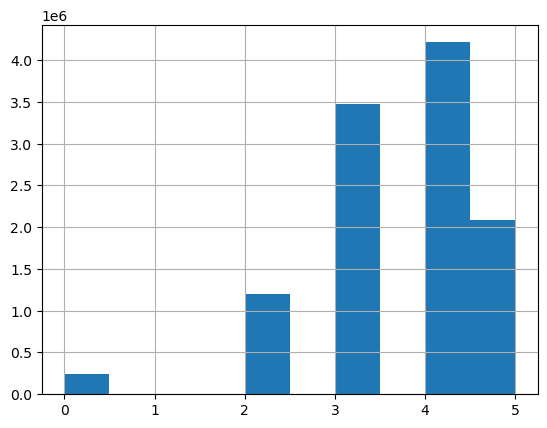

In [55]:
dataset['Отметка'].hist()

##### Признак является порядковым, потому one-hot-encoding не нужен

#### Колонка "Year"

In [58]:
dataset['Year'].value_counts()

Year
2019    5914467
2020    5306879
Name: count, dtype: int64

In [59]:
print(f'Пустых строк = {sum(dataset['Year'].isna())}')

Пустых строк = 0


In [60]:
dataset['Year'] = dataset['Year'].agg(lambda x: int(x))

C:\Users\isazo\AppData\Local\Temp\ipykernel_6892\2039020181.py:1: FutureWarning: using <function <lambda> at 0x000002DB00E75E40> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  dataset['Year'] = dataset['Year'].agg(lambda x: int(x))


<Axes: >

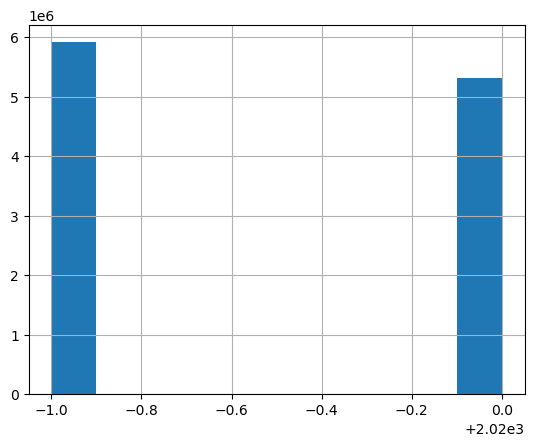

In [61]:
dataset['Year'].hist()

##### Признак является порядковым, потому one-hot-encoding не нужен

In [72]:
dataset.to_csv('new_dataset.csv', index=False)

In [80]:
names_for_clusterization = list(dataset.drop(['ЛогинОО', 'Балл'], axis=1).columns)
other_names = ['ЛогинОО', 'Балл']

#### Кластеризация 
#### Будем проверять гипотезы для альфа 0.001, 0.01, 0.05, 0.1, 0.2

##### Случайное создание подвыборки

In [83]:
# Создание случайной выборки размера alpha*n, где n- размер сета 
def get_random_samples(alpha, scores):
    
    return random.sample(scores,int(len(scores)*alpha))



In [89]:
# Если pvalue меньше 0.05, то распределения разные 
def get_pvalues_and_metrics(f, alpha,  n = 100):

    pvalues, d_means, d_stds, d_medians = [], [], [], [] 
    scores = list(np.array(dataset['Балл']))
    score_mean, score_stds, score_medians = np.mean(scores), np.std(scores), np.median(scores)
    for i in range(n):
        sample = f(alpha, scores)

        pvalues.append(stats.kstest(scores,sample)[1])
        d_means.append(np.mean(scores) - np.mean(sample))
        d_stds.append(np.std(scores) - np.std(sample))
        d_medians.append(np.median(scores) - np.median(sample))


    return np.mean(pvalues), np.mean(d_means), np.mean(d_stds), np.mean(d_medians)

In [91]:
get_pvalues_and_metrics(get_random_samples, 0.001)


KeyboardInterrupt



In [ ]:
get_pvalues_and_metrics(get_random_samples, 0.01)

In [ ]:
get_pvalues_and_metrics(get_random_samples, 0.05)

In [ ]:
get_pvalues_and_metrics(get_random_samples, 0.1)

In [ ]:
get_pvalues_and_metrics(get_random_samples, 0.2)